# Title: **Fixed Deposit Targeted Marketing Strategies: Insights from BCN Bank's Campaign Analysis**

# Author: **Bruno Nwagbo**

# Email: nwagbob@gmail.com

# Literature

## Introduction

In a competitive banking environment, understanding customer behavior and preferences is crucial for the successful launch of new financial products. BCN Bank Ltd recently introduced a new fixed deposit scheme aimed at attracting a diverse customer base. To ensure the success of this product, the bank initiated a comprehensive phone call campaign targeting over 45,000 customers. The primary goal of this campaign was to segment customers and identify those most likely to opt for the fixed deposit, thereby enabling the bank to tailor its marketing strategies effectively.

Through meticulous data analysis, this project seeks to uncover patterns and factors that influence customer decisions. By examining various demographic and financial attributes, we aim to provide actionable insights that will help BCN Bank optimize its marketing efforts, enhance customer targeting, and ultimately increase the adoption rate of the new fixed deposit scheme. This analysis will not only highlight the characteristics of potential fixed deposit buyers but also guide the bank in developing more personalized and impactful marketing campaigns.








## Objectives

The objectives of this project are:
- To analyse the campaign data and determine the percentage of customers who opted for the fixed deposit.
- To identify key factors influencing customers' decisions to buy fixed deposits.
- To segment customers based on age, education, marital status, account balance, and loan status.
- To develop a scoring system to rank customers based on their likelihood of buying a fixed deposit


# Methodology and Codes

## Importing Libraries and Loading Data

In [1]:
# Loading the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Original Google Drive link
url = 'https://drive.google.com/file/d/1cx4V7vFqW0Sw9PADpsuPAmi96aniRpBk/view?usp=sharing'

# Extract the file ID
file_id = url.split('/')[5]

# Create a direct download URL
direct_download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Load the dataset and setting delimeter
df = pd.read_csv(direct_download_url, delimiter= ';')

## Getting to know my data

In [3]:
# Knowing the summary stats of the features
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [4]:
# Knowing the number of NaN
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
# Knowing the dtype
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## EDA

### Campaign overview

Before we segment their customers, let us understand the sample set (phone call campaign)

In [6]:
# Knowing people who bought fixed deposit.
people_who_bought_deposit = df.groupby('y')['y'].value_counts().reset_index()
people_who_bought_deposit['percentage'] = round(people_who_bought_deposit['count'] / df.shape[0] * 100)
people_who_bought_deposit

,y,count,percentage
0,no,39922,88.0
1,yes,5289,12.0


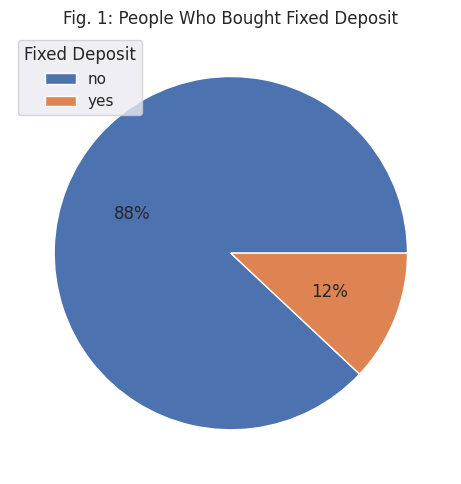

In [7]:
# Visualising the result of the phone call campaign

plt.figure(figsize=(5,5))
plt.title('Fig. 1: People Who Bought Fixed Deposit')
plt.pie(people_who_bought_deposit['percentage'], autopct='%1.0f%%')
plt.legend(people_who_bought_deposit['y'], title='Fixed Deposit')
plt.tight_layout()

# Save the figure
no = 1
plt.savefig(f'Figure {no}.png')

plt.show()

From the phone call campaign, it was discoverd that **5289 out of 45211** opted for thee fixed deposit. This accounts to 12% of the campaign opted for fixed deposit. While people who did not opt for the scheme is **39922 (88%)**. This observation is displayed in Figure 1

After sampling the dataset, I can say in every 100 customers, an average of 12 will buy fixed deposit and at least 1 will buy fixed deposit.

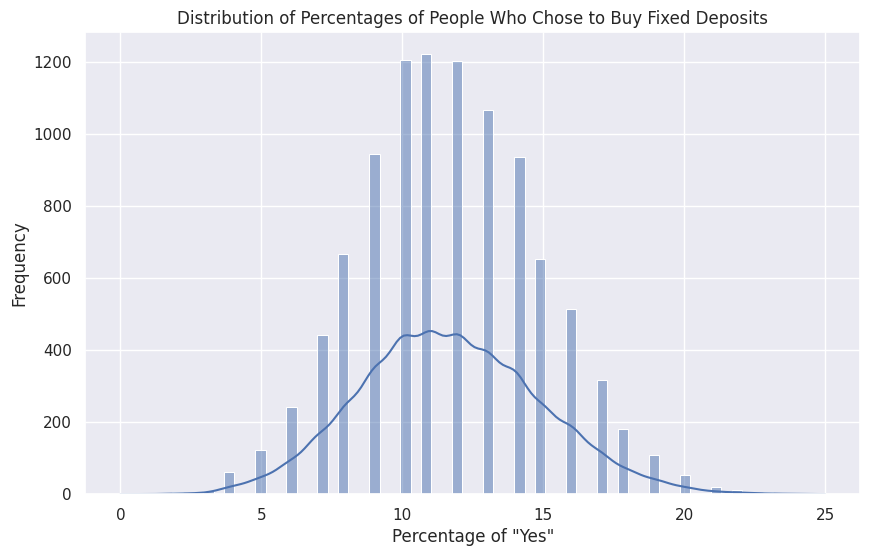


       yes_percentage
count    10000.000000
mean        11.693600
std          3.190194
min          0.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         25.000000

In every 100 customers, an average of 12 customers will buy fixed deposit
In every 100 customers, at least 0 customers will buy fixed deposit


In [8]:
# Function to create a sample and calculate the percentage of 'yes'
def calculate_percentage(df, sample_size, n_samples):
    percentages = []
    for _ in range(n_samples):
        sample = df.sample(n=sample_size, replace=True)
        yes_percentage = (sample['y'] == 'yes').mean() * 100
        percentages.append(yes_percentage)
    return percentages

# Calculate percentages for 100 samples
percentages = calculate_percentage(df, sample_size=100, n_samples=10000)

# Create a DataFrame for the results
percentages_df = pd.DataFrame(percentages, columns=['yes_percentage'])


# Plot the distribution of the percentages
plt.figure(figsize=(10, 6))
sns.histplot(percentages_df['yes_percentage'], kde=True)
plt.title('Distribution of Percentages of People Who Chose to Buy Fixed Deposits')
plt.xlabel('Percentage of "Yes"')
plt.ylabel('Frequency')

# Save the figure
plt.savefig(f'Distribution of Percentages of People Who Chose to Buy Fixed Deposits.png')

plt.show()

print('')
# Display summary statistics
print(percentages_df.describe())

yes_percentage_mean = percentages_df['yes_percentage'].mean()
yes_percentage_min = percentages_df['yes_percentage'].min()

print('')
print(f"In every 100 customers, an average of {round(yes_percentage_mean)} customers will buy fixed deposit")
print(f"In every 100 customers, at least {round(yes_percentage_min)} customers will buy fixed deposit")



### Does age influnce people's decision to buy fixed deposit?

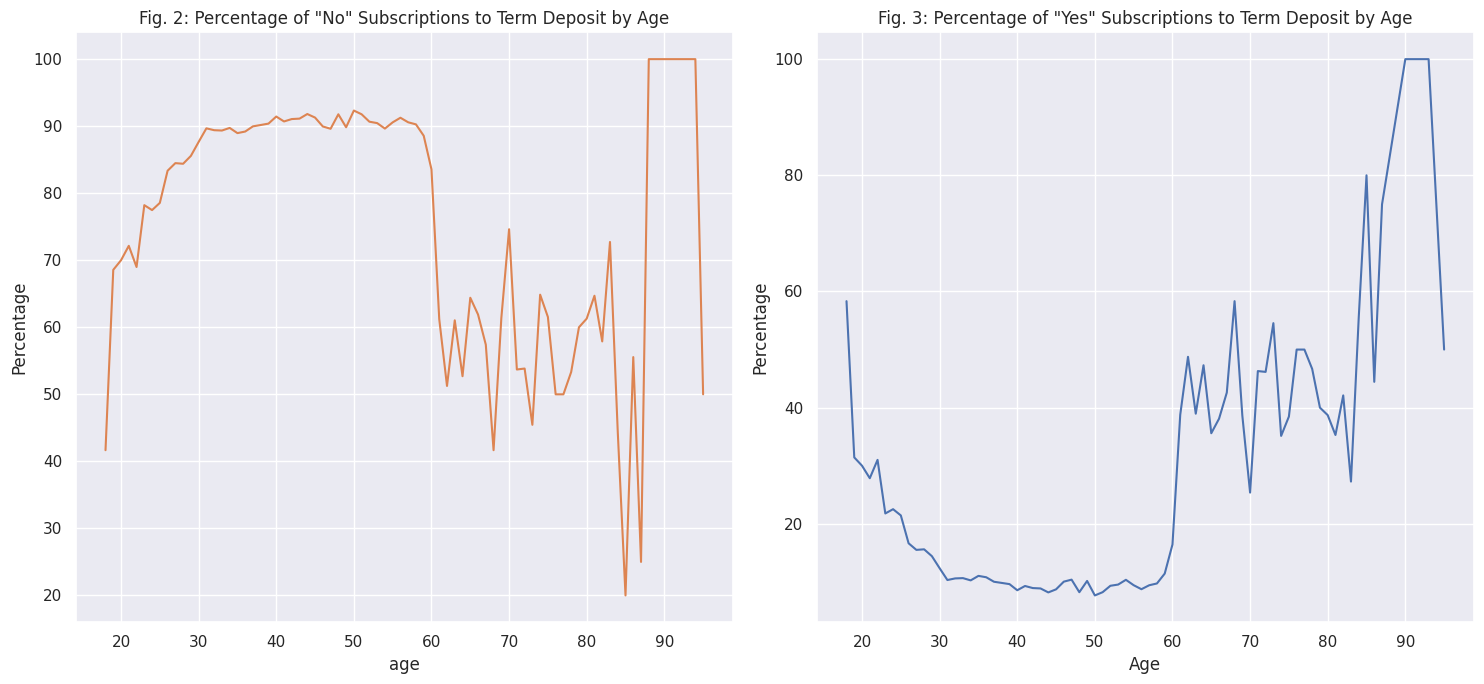

In [9]:
# Aggregate data to get the count of subscriptions per age
age_influence = df.groupby(['age', 'y']).size().reset_index(name='count')

# Calculate the total count of subscriptions for each age
total_counts = df.groupby('age').size().reset_index(name='total_count')

# Merge the total counts with the age_influence DataFrame
age_influence = age_influence.merge(total_counts, on='age')

# Calculate the percentage of 'yes' and 'no' subscriptions for each age
age_influence['percentage'] = (age_influence['count'] / age_influence['total_count']) * 100

# Pivoting the table for easier visualization
age_influence_pivot = age_influence.pivot(index='age', columns='y', values='percentage')



# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 7))


# Plot 'no' subscriptions
sns.lineplot(x=age_influence_pivot.index, y=age_influence_pivot.no, ax=ax[0], color= "#DD8452")
ax[0].set_title('Fig. 2: Percentage of "No" Subscriptions to Term Deposit by Age')
ax[0].set_ylabel('Percentage')

# Plot 'yes' subscriptions
sns.lineplot(x=age_influence_pivot.index, y=age_influence_pivot.yes, ax=ax[1])
ax[1].set_title('Fig. 3: Percentage of "Yes" Subscriptions to Term Deposit by Age')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Percentage')


plt.tight_layout() # Pack them to fit nicely
# Save the figure
plt.savefig(f'Figure 2&3.png')

plt.show()



Figure 2 and 3 shows us how different ages decided to buy fixed deposit. However, it is somewhat messy. Let us group our ages to create age brackets, it will help us segment our customers based on age.

However, I can see potentials of customers between 18 - 25 and 50+ buying fixed deposit

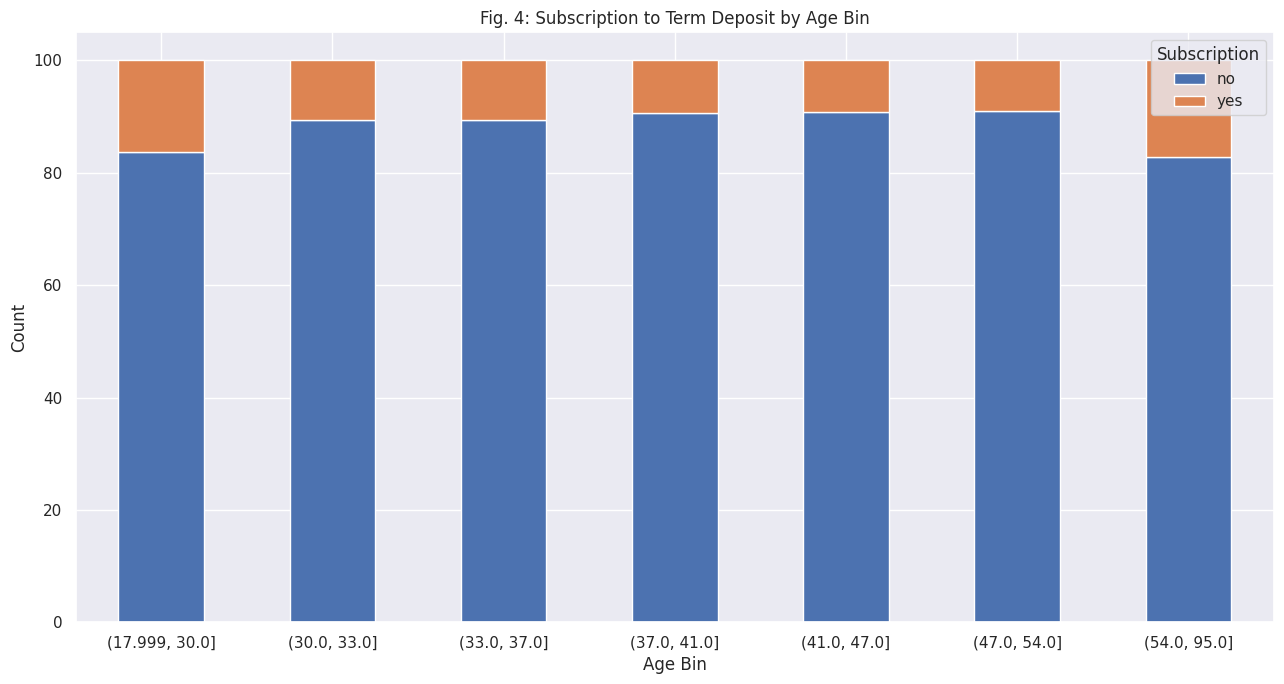

In [10]:
# Create age bins using quantiles (qcut)
df['age_bin'] = pd.qcut(df['age'], q=7)

# I chose qcut because I needed a somewhat balanced bin to draw conclusion on what bracket might be willing to subscribe
# It is best to somewhat have bins with similar class size for asy comparison


# Aggregate data to get the count of subscriptions per age bin
age_bin_influence = df.groupby(['age_bin', 'y']).size().reset_index(name='count')

# Calculate the total count of subscriptions for each age bin
total_counts = df.groupby('age_bin').size().reset_index(name='total_count')

# Merge the total counts with the age_bin_influence DataFrame
age_bin_influence = age_bin_influence.merge(total_counts, on='age_bin')

# Calculate the percentage of 'yes' and 'no' subscriptions for each age bin
age_bin_influence['percentage'] = (age_bin_influence['count'] / age_bin_influence['total_count']) * 100

# Pivot the table for better visualization
age_bin_influence_pivot = age_bin_influence.pivot(index='age_bin', columns='y', values='percentage')

# Plotting the stacked bar chart
age_bin_influence_pivot.plot(kind='bar', stacked=True, figsize=(13, 7))
# Set the labels and title
plt.xlabel('Age Bin')
plt.xticks( rotation=0)
plt.ylabel('Count')
plt.title('Fig. 4: Subscription to Term Deposit by Age Bin')

# Add a legend
plt.legend(title='Subscription')

# Show the plot
plt.tight_layout()
# Save the figure
no = 4
plt.savefig(f'Figure {no}.png')

plt.show()

In [11]:
# Let's see the percentages
age_bin_influence_pivot

y,no,yes
age_bin,,
"(17.999, 30.0]",83.712660,16.287340
"(30.0, 33.0]",89.476293,10.523707
"(33.0, 37.0]",89.462189,10.537811
"(37.0, 41.0]",90.659046,9.340954
"(41.0, 47.0]",90.823596,9.176404
"(47.0, 54.0]",90.955394,9.044606
"(54.0, 95.0]",82.790046,17.209954


From Fig. 4, I can say there is an higher chance of converting customers within the ages of 18 and 30 as well as 54 and above.


### Does education influence customers' decision

I believe educatuion do affect customers' decision to buy fixeed deposit.

My assumption is that education teaches people how to plan their finances.

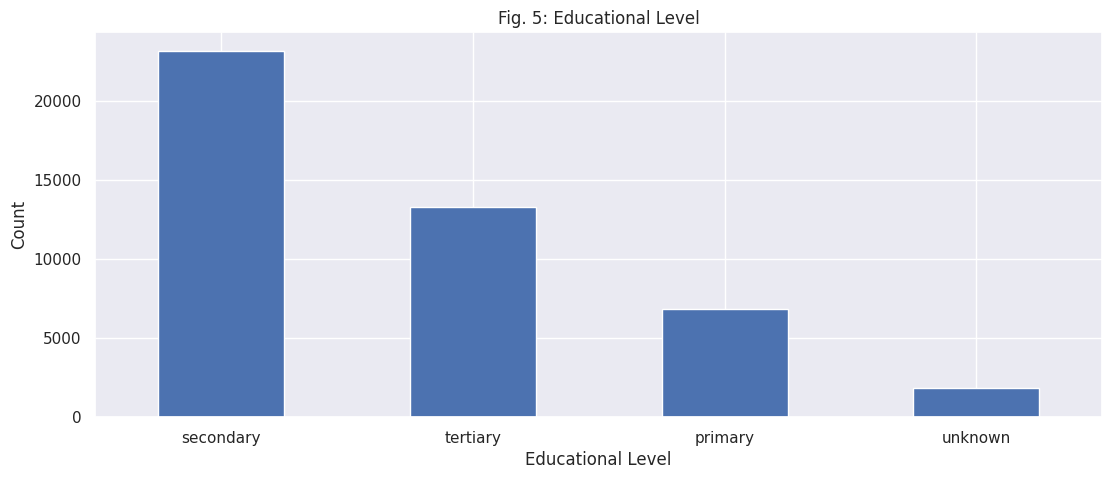

In [12]:
# Let us visualise customers educational level

plt.figure(figsize=(13, 5))
df.education.value_counts().plot(kind='bar')
plt.title('Fig. 5: Educational Level')
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Save the figure
no += 1
plt.savefig(f'Figure {no}.png')

plt.show()

From the campaign, they have more customers who their highest level of education is secondary.

Now that we have the general lay of the land, let us determine if indeed it affects the decision.

Before doing that, I will be subsetting unknown out since there are many interpretations of unknown and it could make the analysis vague.

In [13]:
# Removing unknown
df_without_unknown = df[df['education'] != 'unknown']

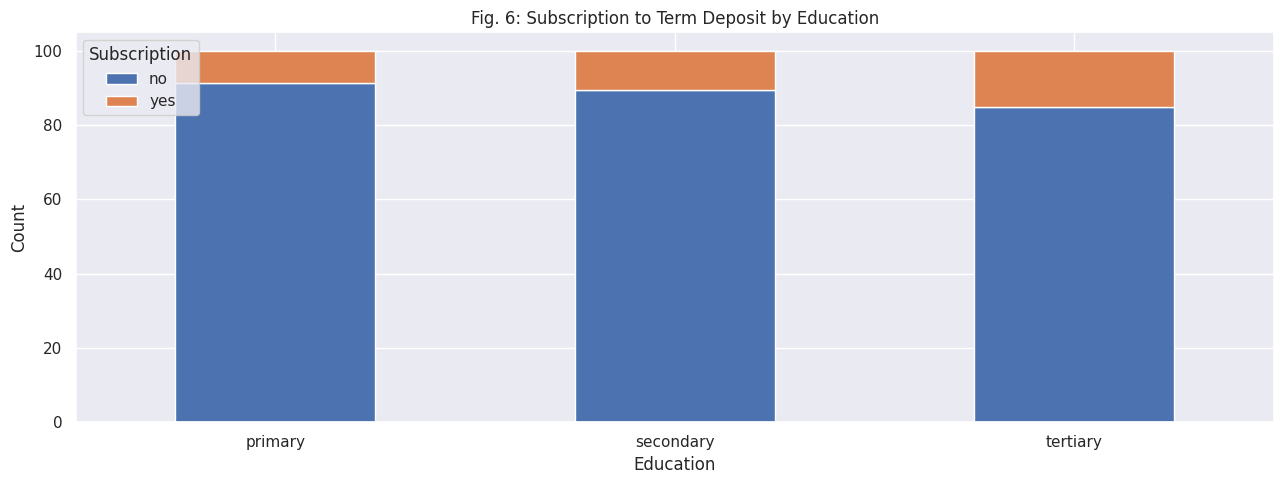

In [14]:
# Aggregate data to get the count of subscriptions per education
education_influence = df_without_unknown.groupby(['education', 'y']).size().reset_index(name='count')

# Calculate the total count of subscriptions for each age
education_counts = df_without_unknown.groupby('education').size().reset_index(name='total_count')

# Merge the total counts with the age_influence DataFrame
education_influence = education_influence.merge(education_counts, on='education')

# Calculate the percentage of 'yes' and 'no' subscriptions for each age
education_influence['percentage'] = (education_influence['count'] / education_influence['total_count']) * 100

# Pivoting the table for easier visualization
education_influence_pivot = education_influence.pivot(index='education', columns='y', values='percentage')


# Plotting the stacked bar chart
education_influence_pivot.plot(kind='bar', stacked=True, figsize=(13, 5))
# Set the labels and title
plt.xlabel('Education')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Fig. 6: Subscription to Term Deposit by Education')

# Add a legend
plt.legend(title='Subscription', loc= 'upper left')

# Show the plot
plt.tight_layout()
# Save the figure
no += 1
plt.savefig(f'Figure {no}.png')
plt.show()

From Fig. 6, I can deduce that education influences customers' decision to buy fixed deposits.
It's go further to filter the no fixed deposit and view customers who opt for fixed deposit.

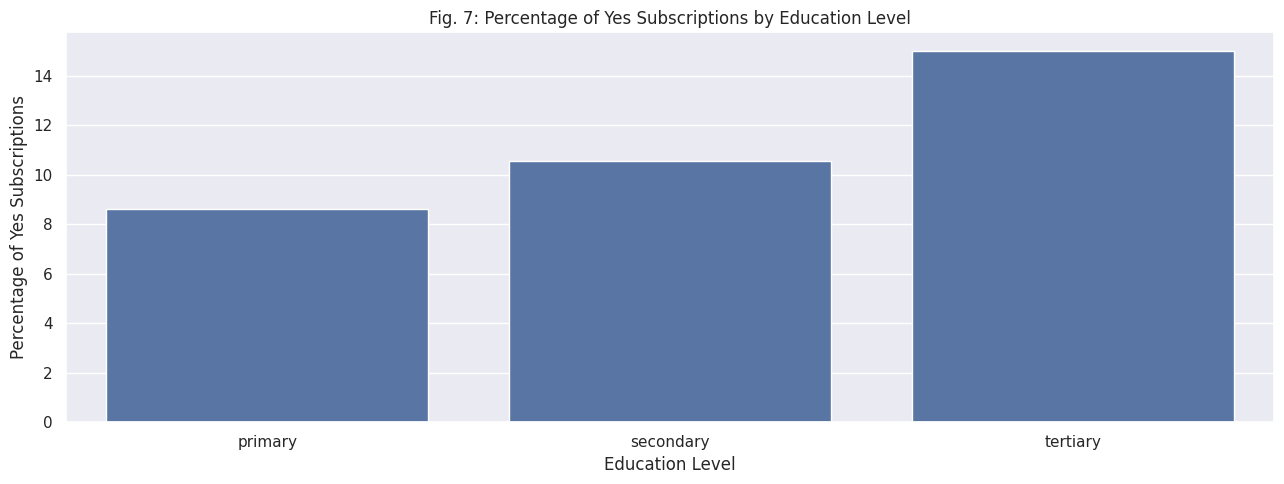

In [15]:
# Filter data for 'yes' subscriptions only
data = education_influence[education_influence['y'] == 'yes']

# Plotting the bar chart for 'yes' subscriptions
plt.figure(figsize=(13, 5))
sns.barplot(x='education', y='percentage', data=data)
# I used percentage instead of count because of the population imbalance.
# There are more people whose highest educational level is at secondary level

# Set the labels and title
plt.xlabel('Education Level')
plt.ylabel('Percentage of Yes Subscriptions')
plt.title('Fig. 7: Percentage of Yes Subscriptions by Education Level')

# Show the plot
plt.tight_layout()

# Save the figure
no += 1
plt.savefig(f'Figure {no}.png')

plt.show()

Looking at figure 7, I can accept the hypothesis and conclude that education do play a big role. I advise the bank to target tertiary educated individuals

### Does marital status influence customers decision to buy fixed deposit?

I hypothesize that married individuals will opt for fixed deposit because of joint finances. Before testing my hypothesis, let's check the lay of the land

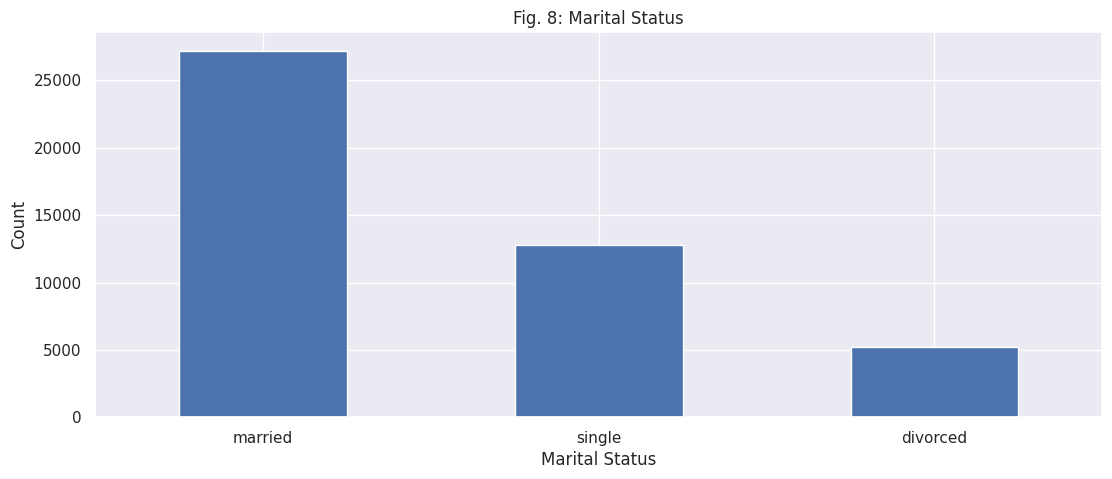

In [16]:
df.marital.value_counts().plot(kind='bar', figsize=(13, 5))
plt.title('Fig. 8: Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Save the figure
no += 1
plt.savefig(f'Figure {no}.png')

plt.show()

There are more married people in this campaign. Due to the population imbalance favouring married people, I will put it into consideration.

Let's us test my proposed hypothesis: "Married people are more likely to buy than the rest in the order of married > single > divorced"

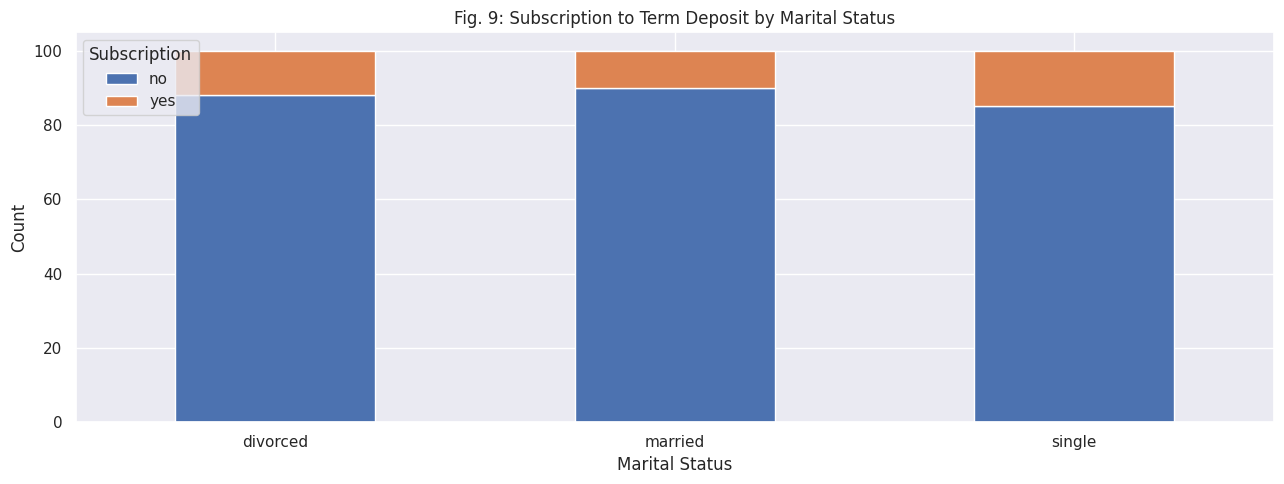

In [17]:
# Aggregate data to get the count of subscriptions per marital status
marital_influence = df.groupby(['marital', 'y']).size().reset_index(name='count')

# Calculate the total count of subscriptions for each age
marital_counts = df.groupby('marital').size().reset_index(name='total_count')

# Merge the total counts with the age_influence DataFrame
marital_influence = marital_influence.merge(marital_counts, on='marital')

# Calculate the percentage of 'yes' and 'no' subscriptions for each age
marital_influence['percentage'] = (marital_influence['count'] / marital_influence['total_count']) * 100

# Pivoting the table for easier visualization
marital_influence_pivot = marital_influence.pivot(index='marital', columns='y', values='percentage')


# Plotting the stacked bar chart
marital_influence_pivot.plot(kind='bar', stacked=True, figsize=(13, 5))
# Set the labels and title
plt.xlabel('Marital Status')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Fig. 9: Subscription to Term Deposit by Marital Status')

# Add a legend
plt.legend(title='Subscription', loc= 'upper left')

# Show the plot
plt.tight_layout()

# Save the figure
no += 1
plt.savefig(f'Figure {no}.png')

plt.show()

Fig 9 shows I should reject my marital status influence on buying fixed deposit.
Let's see to what extent by observing the yes people

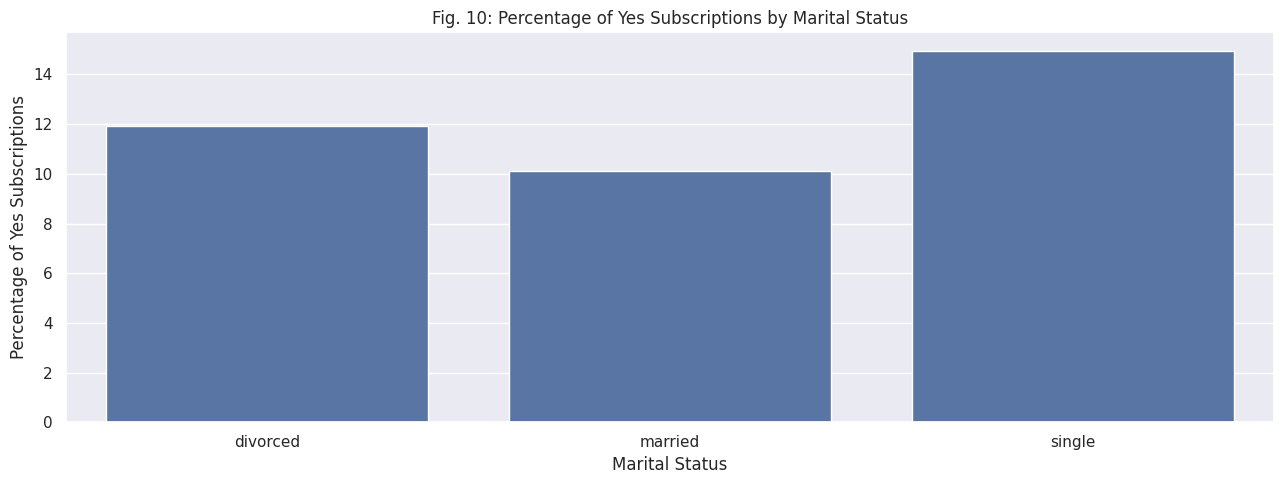

In [18]:
# Filter data for 'yes' subscriptions only
data = marital_influence[marital_influence['y'] == 'yes']

# Plotting the bar chart for 'yes' subscriptions
plt.figure(figsize=(13, 5))
sns.barplot(x='marital', y='percentage', data=data)
# I used percentage instead of count because of the population imbalance.

# Set the labels and title
plt.xlabel('Marital Status')
plt.ylabel('Percentage of Yes Subscriptions')
plt.title('Fig. 10: Percentage of Yes Subscriptions by Marital Status')

# Show the plot
plt.tight_layout()

# Save the figure
no += 1
plt.savefig(f'Figure {no}.png')

plt.show()

Figure 10 shows that single people are more likely to buy fixed deposit then divorced then married.


### Can account balance be a factor?

Probably more money can translate to more money to invest in fixed deposit

In [19]:
# Getting the pentile (5 groups/quantiles) intervals
np.quantile(df['balance'], [0, .20, .4, .6, .8, 1])

array([-8.01900e+03,  2.20000e+01,  2.72000e+02,  7.01000e+02,
        1.85900e+03,  1.02127e+05])

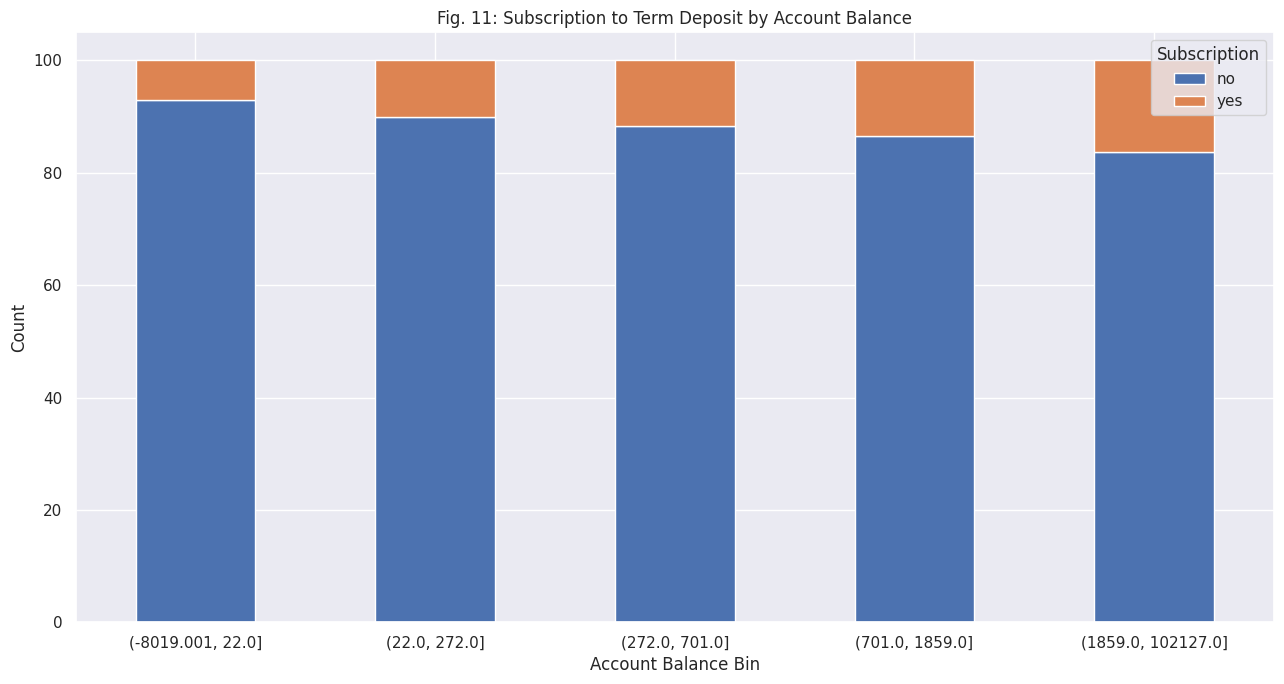

In [20]:
# Create balance bins using quantiles (qcut)
df['balance_bin'] = pd.qcut(df['balance'], q=5)

# I chose qcut because I needed a somewhat balanced bin to draw conclusion on what bracket might be willing to subscribe
# It is best to somewhat have bins with similar class size for asy comparison


# Aggregate data to get the count of subscriptions per balance bin
balance_influence = df.groupby(['balance_bin', 'y']).size().reset_index(name='count')

# Calculate the total count of subscriptions for each balance
total_balance_counts = df.groupby('balance_bin').size().reset_index(name='total_count')

# Merge the total counts with the balance_influence DataFrame
balance_influence = balance_influence.merge(total_balance_counts, on='balance_bin')

# Calculate the percentage of 'yes' and 'no' subscriptions for each balance
balance_influence['percentage'] = (balance_influence['count'] / balance_influence['total_count']) * 100

# Pivoting the table for easier visualization
balance_influence_pivot = balance_influence.pivot(index='balance_bin', columns='y', values='percentage')


# Plotting the stacked bar chart
balance_influence_pivot.plot(kind='bar', stacked=True, figsize=(13, 7))
# Set the labels and title
plt.xlabel('Account Balance Bin')
plt.xticks( rotation=0)
plt.ylabel('Count')
plt.title('Fig. 11: Subscription to Term Deposit by Account Balance')

# Add a legend
plt.legend(title='Subscription')

# Show the plot
plt.tight_layout()

# Save the figure
no += 1
plt.savefig(f'Figure {no}.png')

plt.show()

Indeed figure 11 has proven my hypothesis. More money in the bank can influence customers to buy fixed deposit.

The higher the money in their account, the higher the tendency of buying fixed deposit

In [21]:
# To view the numbers
balance_influence_pivot['yes']

balance_bin
(-8019.001, 22.0]      6.959019
(22.0, 272.0]         10.000000
(272.0, 701.0]        11.711212
(701.0, 1859.0]       13.463879
(1859.0, 102127.0]    16.368060
Name: yes, dtype: float64

### Old Customer vs New Customer

In marketing, it is easier to sell to old customers compared to new customers. Let's determine if it is indeed true.

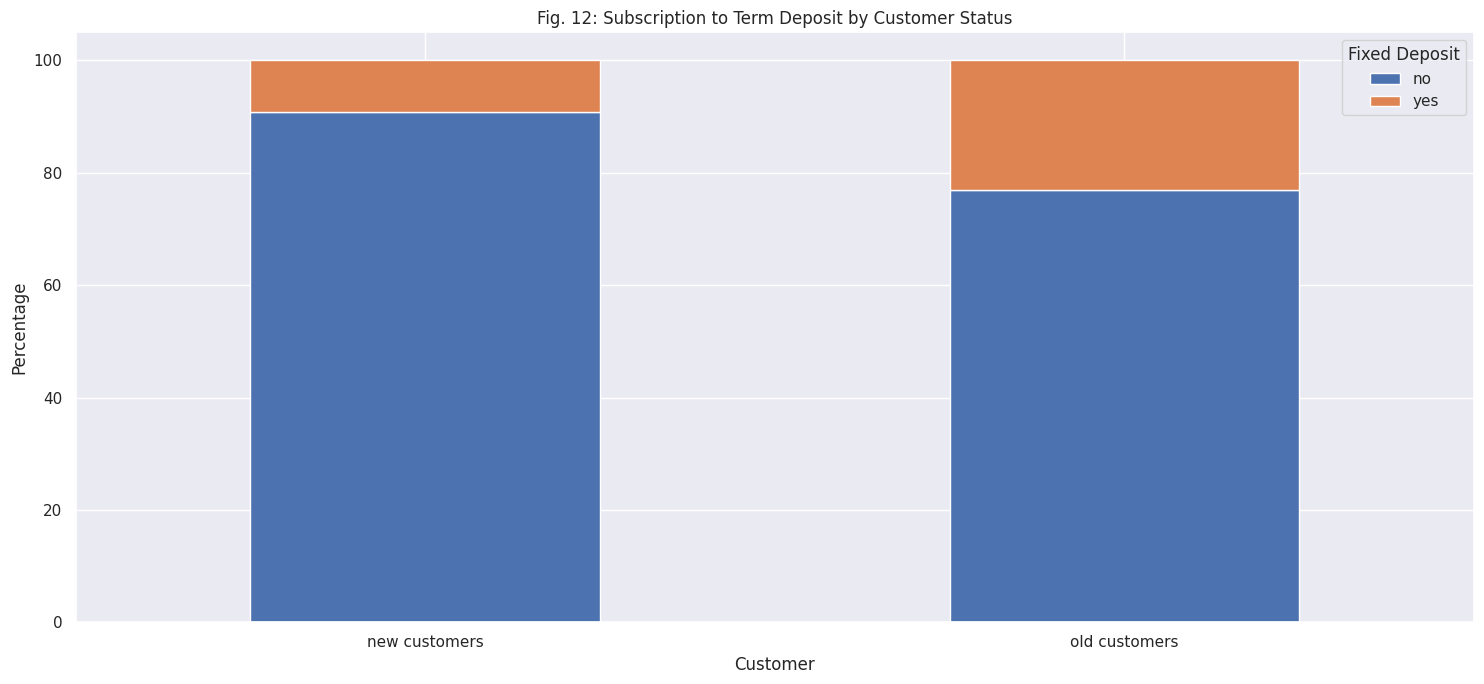

In [22]:
# To answer if new customers are willing to buy, we have to determine those new customers
# I am assuming that customers with pdays -1 (never contacted) are new customers

# Create a new column 'customer' based on the condition
df['customer'] = np.where(df['pdays'] == -1, 'new customers', 'old customers')

# Aggregate data to get the count of subscriptions per customer status
customer_influence = df.groupby(['customer', 'y']).size().reset_index(name='count')

# Calculate the total count of subscriptions for each customer status
total_counts_customer = df.groupby('customer').size().reset_index(name='total_count')

# Merge the total counts with the customer_influence DataFrame
customer_influence = customer_influence.merge(total_counts_customer, on='customer')

# Calculate the percentage of 'yes' and 'no' subscriptions for each customer status
customer_influence['percentage'] = (customer_influence['count'] / customer_influence['total_count']) * 100

# Pivot the table for better visualization
customer_influence_pivot = customer_influence.pivot(index='customer', columns='y', values='percentage')

# Plotting the stacked bar chart
customer_influence_pivot.plot(kind='bar', stacked=True, figsize=(15, 7))
# Set the labels and title
plt.xlabel('Customer')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.title('Fig. 12: Subscription to Term Deposit by Customer Status')

# Add a legend
plt.legend(title='Fixed Deposit')

# Show the plot
plt.tight_layout()

# Save the figure
no += 1
plt.savefig(f'Figure {no}.png')

plt.show()

From figure 12, it is easier to sell fixed deposit to existing customers than new customers.


In [23]:
# View the numbers
customer_influence_pivot['yes']

customer
new customers     9.157331
old customers    23.071333
Name: yes, dtype: float64

### Loans Influences

#### Housing Loans

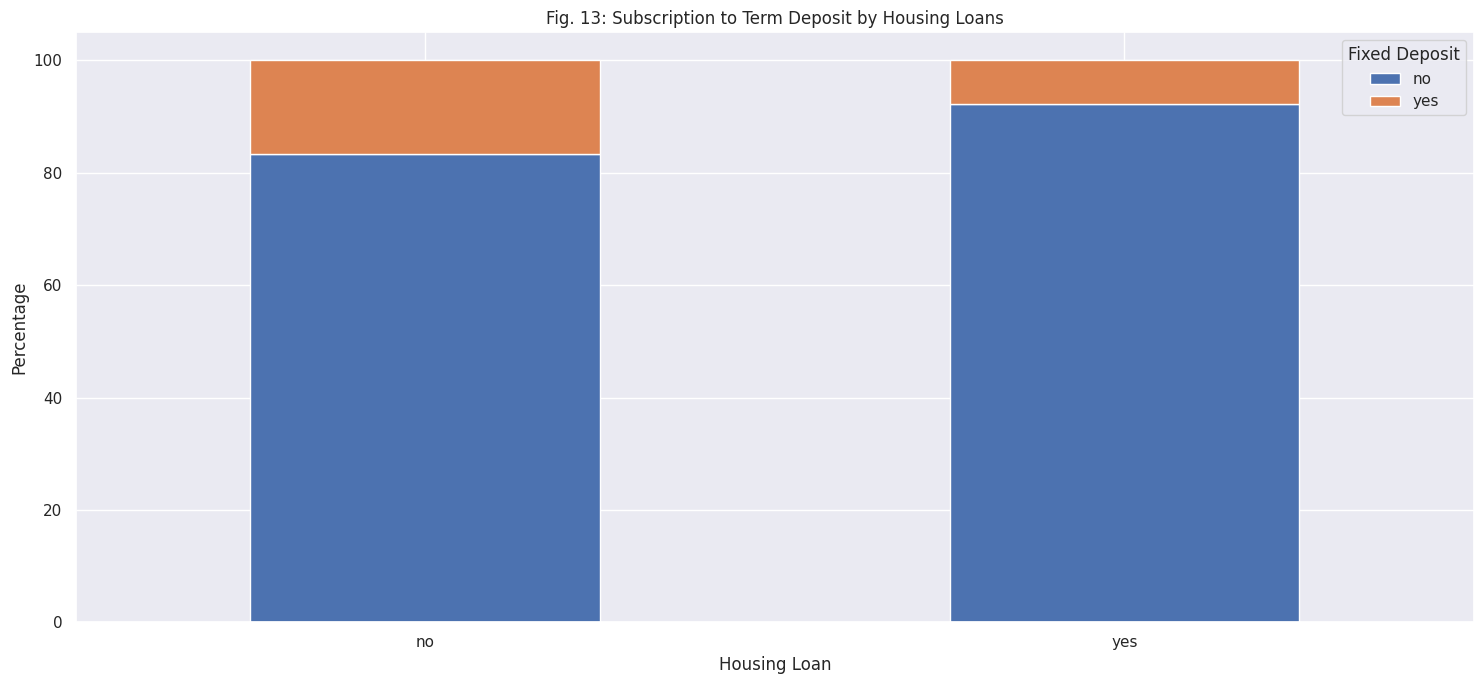

In [24]:
# Aggregate data to get the count of subscriptions per housing loans
housing_loan_influence = df.groupby(['housing', 'y']).size().reset_index(name='count')

# Calculate the total count of subscriptions for each housing loans
total_housing = df.groupby('housing').size().reset_index(name='total_count')

# Merge the total counts with the housing_loan_influence DataFrame
housing_loan_influence = housing_loan_influence.merge(total_housing, on='housing')

# Calculate the percentage of 'yes' and 'no' subscriptions for each housing loans
housing_loan_influence['percentage'] = (housing_loan_influence['count'] / housing_loan_influence['total_count']) * 100

# Pivot the table for better visualization
housing_loan_influence_pivot = housing_loan_influence.pivot(index='housing', columns='y', values='percentage')

# Plotting the stacked bar chart
housing_loan_influence_pivot.plot(kind='bar', stacked=True, figsize=(15, 7))
# Set the labels and title
plt.xlabel('Housing Loan')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.title('Fig. 13: Subscription to Term Deposit by Housing Loans')

# Add a legend
plt.legend(title='Fixed Deposit')

# Show the plot
plt.tight_layout()

# Save the figure
no += 1
plt.savefig(f'Figure {no}.png')

plt.show()

Customers without housing loans tends to buy fixed deposit compared to customers with housing loans

In [25]:
housing_loan_influence_pivot['yes']

housing
no     16.702355
yes     7.699960
Name: yes, dtype: float64

#### Personal Loans

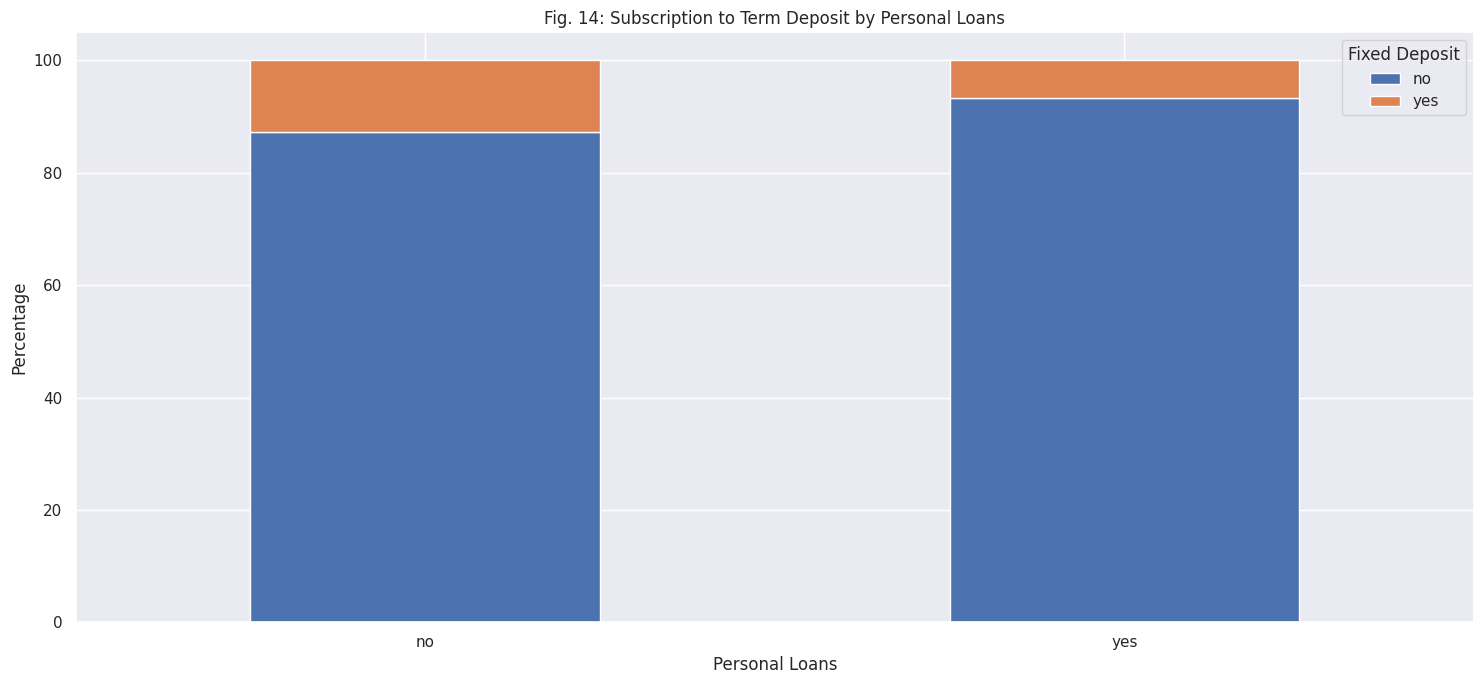

In [26]:
loan_influence = df.groupby(['loan', 'y']).size().reset_index(name='count')

# Calculate the total count of subscriptions for each loans
total_loan = df.groupby('loan').size().reset_index(name='total_count')

# Merge the total counts with the loan_influence DataFrame
loan_influence = loan_influence.merge(total_loan, on='loan')

# Calculate the percentage of 'yes' and 'no' subscriptions for each loans
loan_influence['percentage'] = (loan_influence['count'] / loan_influence['total_count']) * 100

# Pivot the table for better visualization
loan_influence_pivot = loan_influence.pivot(index='loan', columns='y', values='percentage')

# Plotting the stacked bar chart
loan_influence_pivot.plot(kind='bar', stacked=True, figsize=(15, 7))
# Set the labels and title
plt.xlabel('Personal Loans')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.title('Fig. 14: Subscription to Term Deposit by Personal Loans')

# Add a legend
plt.legend(title='Fixed Deposit')

# Show the plot
plt.tight_layout()

# Save the figure
no += 1
plt.savefig(f'Figure {no}.png')

plt.show()

Just as housing loans, customers with personal loans are more likely to buy fixed deposit

In [27]:
# View the numbers
loan_influence_pivot['yes']

loan
no     12.655727
yes     6.681391
Name: yes, dtype: float64

#### Loan Defaulters

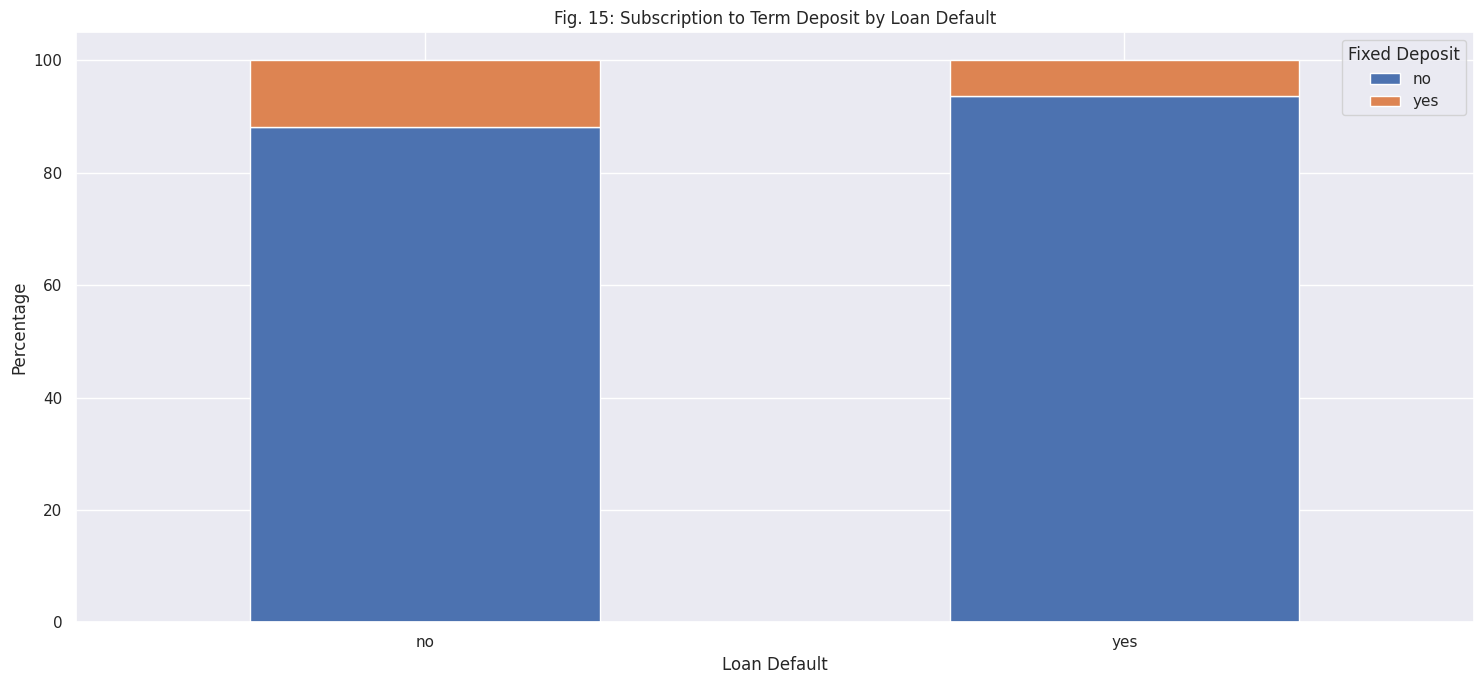

In [28]:
# Aggregate data to get the count of subscriptions per loan default
default_influence = df.groupby(['default', 'y']).size().reset_index(name='count')

# Calculate the total count of subscriptions for each loans default
total_default = df.groupby('default').size().reset_index(name='total_count')

# Merge the total counts with the default_influence DataFrame
default_influence = default_influence.merge(total_default, on='default')

# Calculate the percentage of 'yes' and 'no' subscriptions for each loans default
default_influence['percentage'] = (default_influence['count'] / default_influence['total_count']) * 100

# Pivot the table for better visualization
default_influence_pivot = default_influence.pivot(index='default', columns='y', values='percentage')

# Plotting the stacked bar chart
default_influence_pivot.plot(kind='bar', stacked=True, figsize=(15, 7))
# Set the labels and title
plt.xlabel('Loan Default')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.title('Fig. 15: Subscription to Term Deposit by Loan Default')

# Add a legend
plt.legend(title='Fixed Deposit')

# Show the plot
plt.tight_layout()

# Save the figure
no += 1
plt.savefig(f'Figure {no}.png')

plt.show()

Loan defaulters are less likely to buy fixed deposits.

In [29]:
# Let's view the percenatages
default_influence_pivot['yes']

default
no     11.796108
yes     6.380368
Name: yes, dtype: float64

## Point System

After much consideration and analysis of loans and other features, I think it is best to assign points (grades) to customers to know how likely they will be willing to buy fixed deposits.

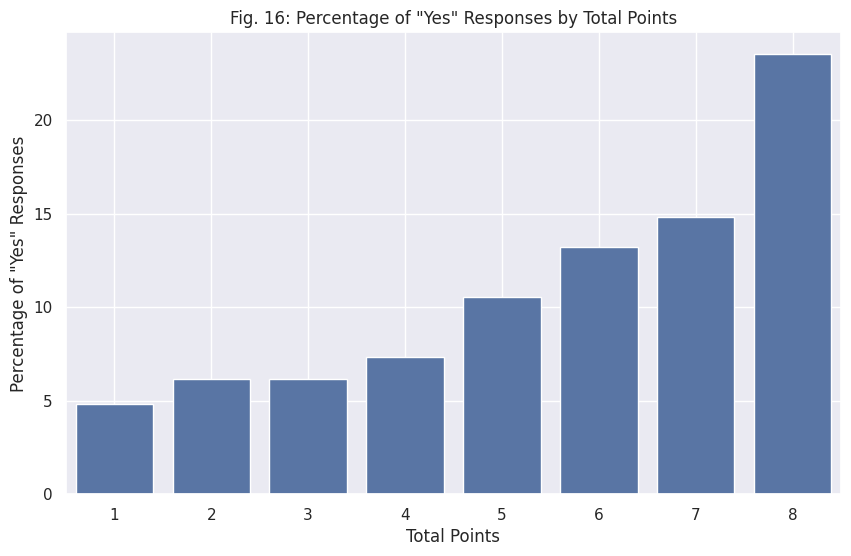

In [30]:
# Define the points assignment
default_points = {'yes': 0, 'no': 1}
housing_points = {'yes': 0, 'no': 1}
loan_points = {'yes': 0, 'no': 1}

# Assign points based on the mapping
df['default_points'] = df['default'].map(default_points)
df['housing_points'] = df['housing'].map(housing_points)
df['loan_points'] = df['loan'].map(loan_points)

# Assign points to the balance bin
df['balance_point'] = pd.qcut(df['balance'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

# Calculate the total points for each customer
df['points'] = df['default_points'] + df['housing_points'] + df['loan_points'] + df['balance_point']

# Analyze the relationship between total_points and 'yes' responses
yes_no_counts = df.groupby(['points', 'y']).size().unstack(fill_value=0)

# Calculate the percentage of 'yes' responses for each total_points value
yes_no_counts['percentage_yes'] = (yes_no_counts['yes'] / (yes_no_counts['yes'] + yes_no_counts['no'])) * 100

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=yes_no_counts.index, y=yes_no_counts['percentage_yes'])
plt.title('Fig. 16: Percentage of "Yes" Responses by Total Points')
plt.xlabel('Total Points')
plt.ylabel('Percentage of "Yes" Responses')
plt.grid(True)

# Save the figure
no += 1
plt.savefig(f'Figure {no}.png')

plt.show()

In [31]:
# Let's get the percentages
yes_no_counts

y,no,yes,percentage_yes
points,,,
1,99,5,4.807692
2,1482,97,6.143129
3,5213,342,6.156616
4,7922,626,7.323350
5,8039,947,10.538616
6,7309,1113,13.215388
7,6543,1140,14.837954
8,3315,1019,23.511767


Seeing the success of the point system which shows that the higher the points, the higher the tendency to buy which is shown in figure 16.

Let's add new customer vs old customer to the total point

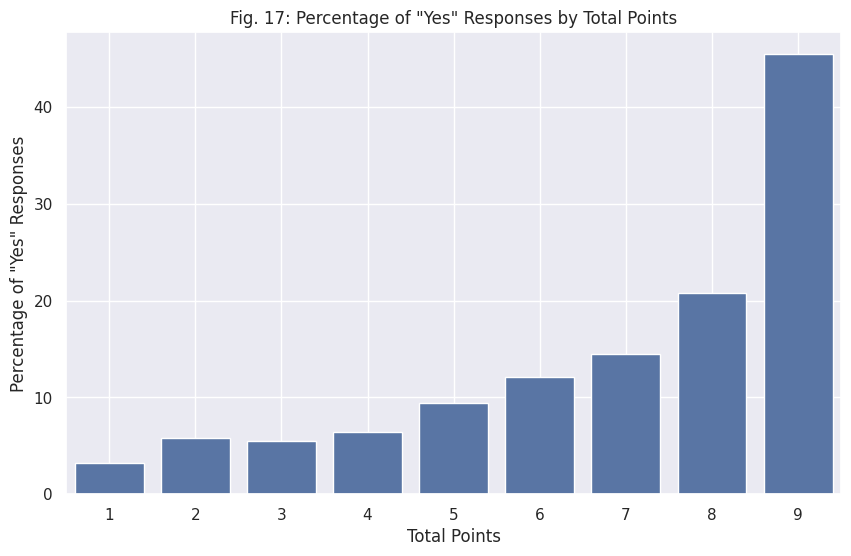

In [32]:
customer_points = {'new customers': 0, 'old customers': 1}

# Assign points based on the mapping
df['customer_points'] = df['customer'].map(customer_points)

# Calculate the total points for each customer
df['points'] = df['default_points'] + df['housing_points'] + df['loan_points'] + df['balance_point'] + df['customer_points']

# Analyze the relationship between total_points and 'yes' responses
yes_no_counts = df.groupby(['points', 'y']).size().unstack()

# Calculate the percentage of 'yes' responses for each total_points value
yes_no_counts['percentage_yes'] = (yes_no_counts['yes'] / (yes_no_counts['yes'] + yes_no_counts['no'])) * 100

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=yes_no_counts.index, y=yes_no_counts['percentage_yes'])
plt.title('Fig. 17: Percentage of "Yes" Responses by Total Points')
plt.xlabel('Total Points')
plt.ylabel('Percentage of "Yes" Responses')
plt.grid(True)

# Save the figure
no += 1
plt.savefig(f'Figure {no}.png')

plt.show()

In [33]:
# let's see the numbers
yes_no_counts

y,no,yes,percentage_yes
points,,,
1,90,3,3.225806
2,1275,79,5.834564
3,4674,271,5.480283
4,7563,524,6.479535
5,7837,816,9.430255
6,7306,1007,12.113557
7,6736,1139,14.463492
8,3944,1036,20.803213
9,497,414,45.444566


There is potential for the point system. With the addition of customer status (old/new), there is a higher tendency to know whether they buy or not which is shown in figure 17

# Observation

BCN Bank Ltd recently conducted a comprehensive phone call campaign to promote its new fixed deposit scheme. The results from this campaign revealed that out of 45,211 customers contacted, 5,289 opted for the fixed deposit, accounting for 12% of the total. Conversely, 39,922 (88%) customers did not opt for the scheme, as shown in Figure 1.

## Sampling Insights

Upon analyzing samples of the dataset, it was observed that, on average, 12 out of every 100 customers chose to buy the fixed deposit, with a minimum of 1 customer per 100 making the decision. This low conversion rate highlights the need for targeted marketing strategies to maximize resource efficiency and reach the right audience.

## Age Influence

Figures 2 and 3 illustrated the relationship between age and the decision to buy a fixed deposit. Initially, the data appeared cluttered, prompting the grouping of ages into brackets for clearer segmentation. This revealed promising potential among customers aged 18-25 and those over 50.

Figure 4 further refined this observation, indicating a higher conversion likelihood among customers aged 18-30 and those 54 and above.

## Education's Impact

The analysis suggested that education significantly influences a customer's decision to purchase a fixed deposit. It is assumed that higher education levels instill better financial planning skills. The campaign predominantly featured customers whose highest education level was secondary school.

By excluding data labeled 'unknown' to avoid ambiguity, Figure 6 demonstrated that education indeed impacts the decision to buy fixed deposits. Figure 7 confirmed this hypothesis, showing that tertiary-educated individuals are more likely to opt for fixed deposits. Hence, targeting these individuals would be a strategic move for the bank.

## Marital Status

It was hypothesized that married individuals might be more inclined to invest in fixed deposits due to joint financial planning. Initial observations showed a higher number of married individuals in the campaign, but due to the population imbalance, this required careful consideration.

Testing the hypothesis, Figure 9 indicated that marital status might not significantly influence the decision. Figure 10 revealed that single individuals are more likely to buy fixed deposits, followed by divorced and married individuals.

## Account Balance

The hypothesis that a higher account balance correlates with a higher likelihood of purchasing fixed deposits was supported by Figure 11. Customers with more money in the bank tend to invest more in fixed deposits.

## Customer Status

Marketing strategies often suggest that it is easier to sell to existing customers compared to new ones. Figure 12 validated this by showing that existing customers were more inclined to buy fixed deposits than new customers.

## Loan Influences

Figures 13 and subsequent analyses explored the impact of different types of loans on the decision to purchase fixed deposits. Customers without housing loans were more likely to buy fixed deposits (17%) compared to those with housing loans (8%). Similarly, those without personal loans were more likely to invest in fixed deposits.

Defaulting on loans also influenced the decision negatively, as shown by the lower percentage of loan defaulters opting for fixed deposits.

## Point System

To further refine customer targeting, a point system was developed to grade customers based on various factors. The system revealed that higher points correlated with a higher likelihood of purchasing fixed deposits, as illustrated in Figure 16. Incorporating customer status (old/new) into this point system enhanced its predictive accuracy, as shown in Figure 17.


# Conclusion



The analysis highlights critical factors influencing the decision to buy fixed deposits, including age, education, account balance, and customer status. By leveraging these insights, BCN Bank can optimize its marketing strategies to target the most promising customer segments, thereby increasing the adoption rate of its new fixed deposit scheme.

# Machine Learning Phase

Prepping the data for ML

In [34]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_bin', 'balance_bin', 'customer',
       'default_points', 'housing_points', 'loan_points', 'balance_point',
       'points', 'customer_points'],
      dtype='object')

In [35]:
columns = ['age', 'age_bin', 'job', 'marital', 'education', 'points', 'y']
ml_df = df[columns]
ml_df.head()

,age,age_bin,job,marital,education,points,y
0,58,"(54.0, 95.0]",management,married,tertiary,7,no
1,44,"(41.0, 47.0]",technician,single,secondary,4,no
2,33,"(30.0, 33.0]",entrepreneur,married,secondary,2,no
3,47,"(41.0, 47.0]",blue-collar,married,unknown,6,no
4,33,"(30.0, 33.0]",unknown,single,unknown,4,no


In [36]:
for i in ml_df.columns:
    print(i, ml_df[i].unique())

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
age_bin [(54.0, 95.0], (41.0, 47.0], (30.0, 33.0], (33.0, 37.0], (17.999, 30.0], (37.0, 41.0], (47.0, 54.0]]
Categories (7, interval[float64, right]): [(17.999, 30.0] < (30.0, 33.0] < (33.0, 37.0] <
                                           (37.0, 41.0] < (41.0, 47.0] < (47.0, 54.0] <
                                           (54.0, 95.0]]
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
points [7 4 2 6 5 3 8 1 9]
y ['no' 'yes']


In [37]:
# Calculating the number of unknown jobs and getting its percenatage
print(f"{ml_df[ml_df.job == 'unknown'].shape[0]} unknown job title")
print(f"{round(ml_df[ml_df.job == 'unknown'].shape[0]/ml_df.shape[0]*100, 2)}% unknown job title percentage")

288 unknown job title
0.64% unknown job title percentage


In [38]:
# Dropping unknown job title
ml_df = ml_df[ml_df.job != 'unknown']

In [39]:
# Saving ml_df to csv
ml_df.to_csv('ml_bank_marketing.csv')